In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1,EfficientNetB2,EfficientNetB3,EfficientNetB4,EfficientNetB5,EfficientNetB6,EfficientNetB7
print('TF',tf.__version__)


TF 2.6.4


In [4]:
# data = pd.read_csv('../input/shopee-product-matching/train.csv')
# data_gf = pd.read_csv('../input/shopee-product-matching/train.csv')
# img_dir = '../input/shopee-product-matching/train_images/'

In [5]:
data


,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [6]:
def displayDF(data, random=False, COLS=6, ROWS=4, path=img_dir):
    for k in range(ROWS):
        plt.figure(figsize=(20,5))
        for j in range(COLS):
            if random: 
                row = np.random.randint(0,len(data))
            else: 
                row = COLS*k + j
            name = data.iloc[row,1]
            title = data.iloc[row,3]
            title_with_return = ""
            for i,ch in enumerate(title):
                title_with_return += ch
                if (i!=0)&(i%20==0): title_with_return += '\n'
            img = cv2.imread(path+name)
            plt.subplot(1,COLS,j+1)
            plt.title(title_with_return)
            plt.axis('off')
            plt.imshow(img)
        plt.show()

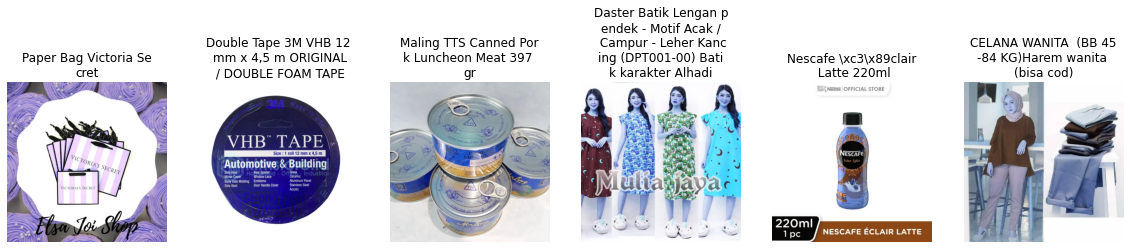

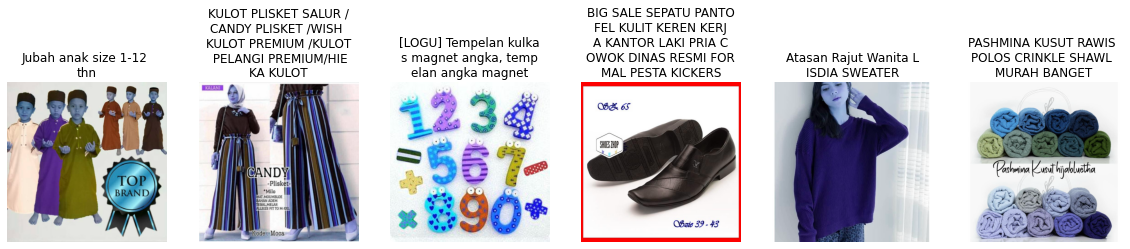

In [7]:
displayDF(data,random=False, COLS=6, ROWS=2)

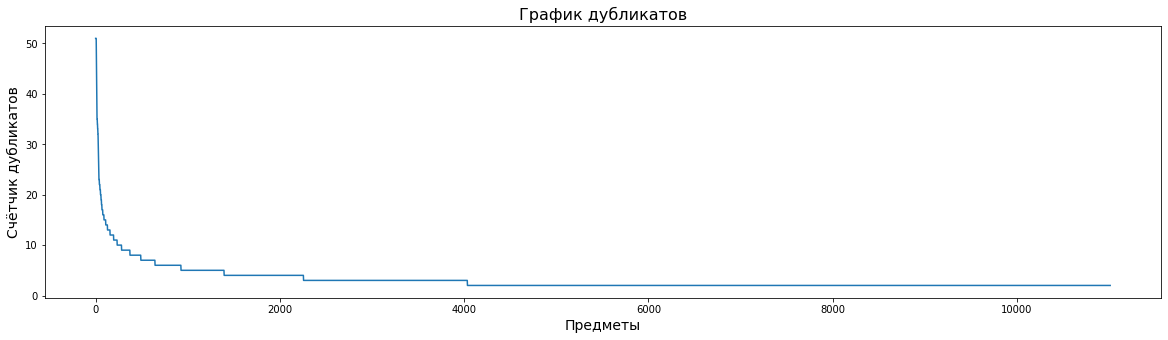

In [11]:
groups = data.label_group.value_counts()
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(groups)),groups.values)
plt.ylabel('Счётчик дубликатов',size=14)
plt.xlabel('Предметы',size=14)
plt.title('График дубликатов',size=16)
plt.show()

In [14]:
groups[:50]

994676122     51
1163569239    51
1141798720    51
159351600     51
562358068     51
3113678103    51
3627744656    51
3206118280    49
1733221456    46
1166650192    46
1091404026    45
3489985175    41
1237550763    37
1746655739    36
452508504     35
731330024     35
4184214313    35
2008989859    35
1575763518    34
66247839      34
871679006     34
952183003     33
2259957740    33
3001123709    33
2999794436    32
2935813666    32
3926100920    32
656698835     31
1226500780    31
997220911     30
1201602115    27
821583868     26
3717044186    25
3868183614    25
1135976474    24
3326267479    24
3040690230    23
927285629     23
1306578136    23
2156459496    23
4141124289    22
2123332638    22
418991059     22
1569494229    22
3441184770    22
777596345     22
1744240905    21
2956941947    21
1065450055    21
1544174053    21
Name: label_group, dtype: int64

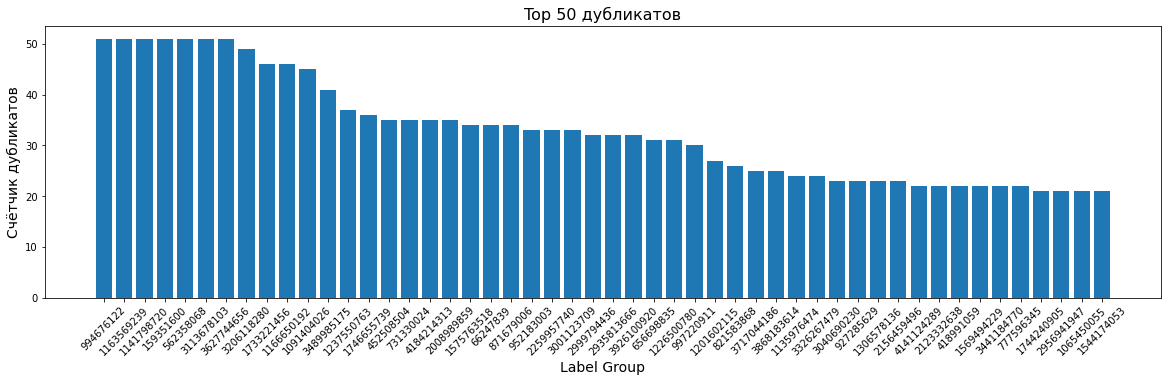

In [12]:
plt.figure(figsize=(20,5))
plt.bar(groups.index.values[:50].astype('str'),groups.values[:50])
plt.xticks(rotation = 45)
plt.ylabel('Счётчик дубликатов',size=14)
plt.xlabel('Label Group',size=14)
plt.title('Top 50 дубликатов',size=16)
plt.show()

########################################
### TOP 1 Дубликат: 994676122
########################################


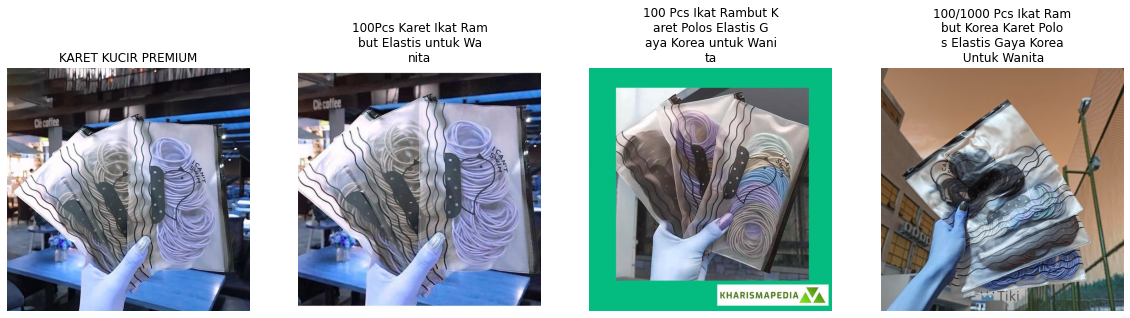

########################################
### TOP 2 Дубликат: 1163569239
########################################


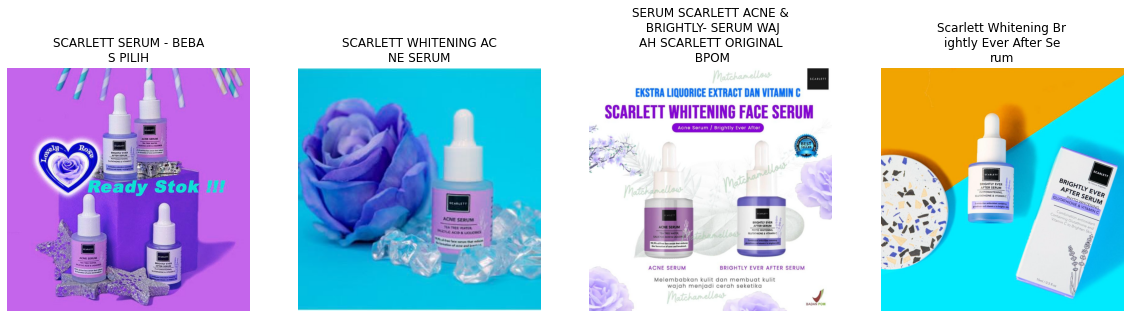

########################################
### TOP 3 Дубликат: 1141798720
########################################


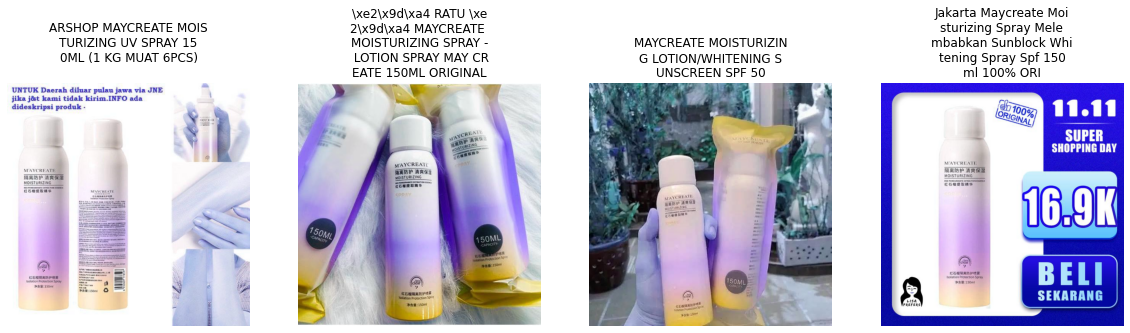

########################################
### TOP 4 Дубликат: 159351600
########################################


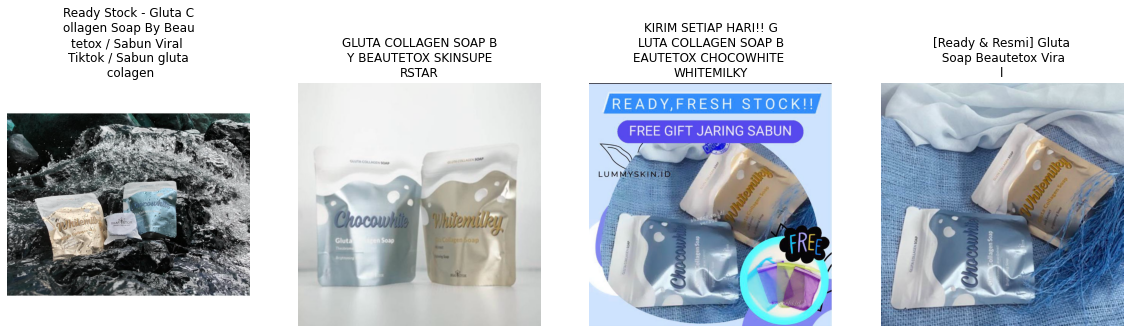

########################################
### TOP 5 Дубликат: 562358068
########################################


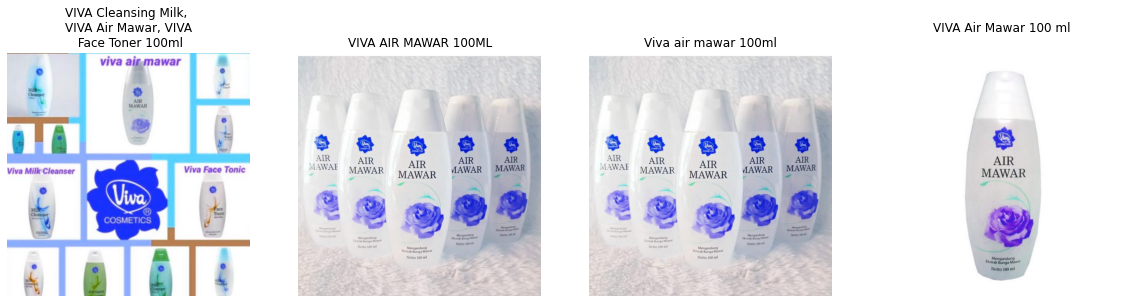

In [14]:
for k in range(5):
    print('#'*40)
    print('### TOP %i Дубликат:'%(k+1),groups.index[k])
    print('#'*40)
    top = data.loc[data.label_group==groups.index[k]]
    displayDF(top, random=False, ROWS=1, COLS=4)
